# **METEHAN DÜNDAR**

Introduction to Data Science

Assignment 2 Part 2

Logistic Additive Regression

# Research Issue
Given the dataset and context of investigating diabetes among adult female Pima Indians, a research question that focuses on two essential elements is appropriate:

**How do various physiological and genetic factors (e.g., pregnancy number, plasma glucose concentration, blood pressure, skin fold thickness, insulin level, BMI, age, and diabetes pedigree function) contribute to the risk of developing diabetes in adult female Pima Indians living near Phoenix, and which of these factors are the most significant predictors of the disease?**

This question covers two critical issues:

1. **Identification of Risk Factors:** Examining the influence of numerous factors on diabetes risk, including both physiological (e.g., glucose concentration, blood pressure, BMI) and genetic (e.g., diabetes pedigree function) factors.

2. **Diagnosis Prediction:** Evaluating the possibility for utilising these parameters to forecast the likelihood of diabetes diagnosis, taking into account the variable 'test' that indicates whether the patient has diabetes (1) or not (0).

# Exploratory Analysis

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/sample_data/diabetes.csv'
data = pd.read_csv(file_path)

# Checking for missing values
missing_values = data.isnull().sum()

# Basic statistical summary
statistical_summary = data.describe()

# Summary statistics of the numerical variables
statistical_summary

pregnant     glucose   diastolic     triceps     insulin         bmi  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

         diabetes         age        test  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%      0.372500   29.000000    0.000000  
75%      0.626250   41.000000    1.000000  
max      2.420000   81.000000    1.000000

This gives an overview of the distribution of the data. The dataset has 768 entries with no missing values, which is great for analysis. Here's a summary of the data:  
  * Pregnant: Ranges from 0 to 17 with a mean of about 3.85.
  * Glucose: Ranges from 0 to 199 with a mean of about 120.89.
  * Diastolic: Ranges from 0 to 122 with a mean of about 69.11.
  * Triceps: Ranges from 0 to 99 with a mean of about 20.54.
  * Insulin: Ranges from 0 to 846 with a mean of about 79.80.
  * BMI: Ranges from 0 to 67.10 with a mean of about 31.99.
  * Diabetes: The Diabetes Pedigree Function has values ranging from 0.078 to 2.42 with a mean of about 0.47.
  * Age: Ranges from 21 to 81 years with a mean of about 33.24.
  * Test: 34.9% of the individuals in this dataset show signs of diabetes.



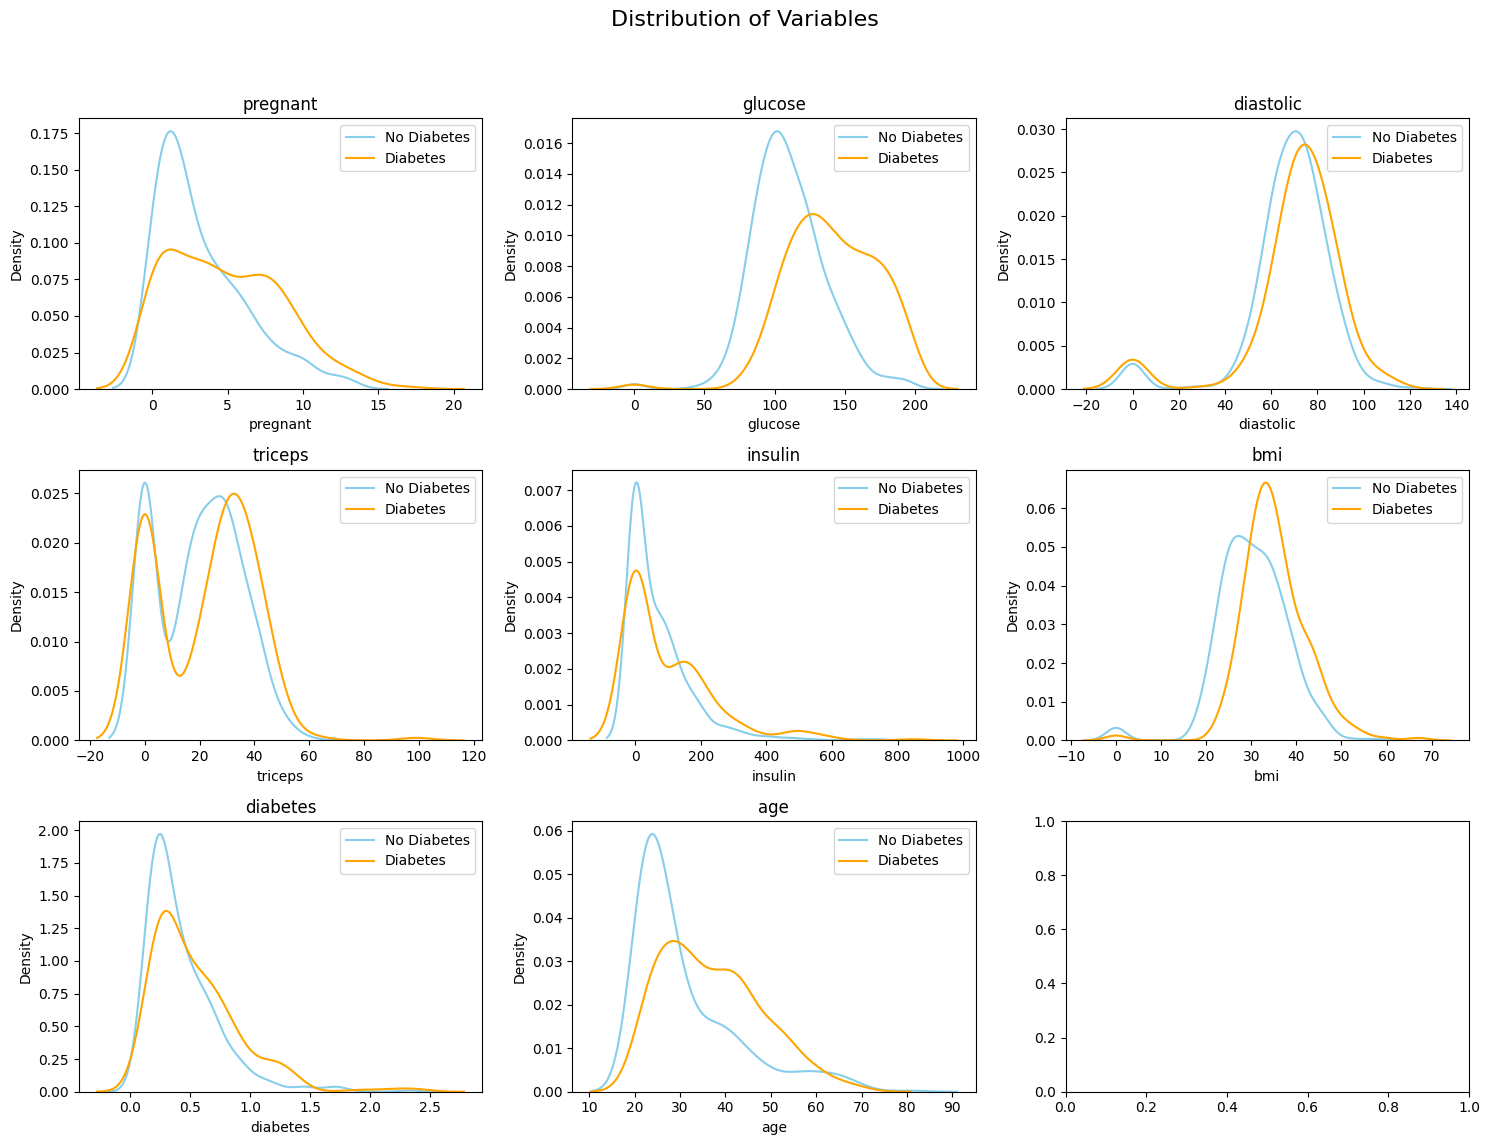

In [ ]:
import matplotlib.pyplot as plt

# Histograms for each variable
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
fig.suptitle('Distribution of Variables', fontsize=16)
cols = list(data.columns)
cols.remove('test')
for i, col in enumerate(cols):
    ax = axes[i//3, i%3]
    sns.kdeplot(data[col][data['test'] == 0], label='No Diabetes', color='skyblue', ax=ax)
    sns.kdeplot(data[col][data['test'] == 1], label='Diabetes', color='orange', ax=ax)
    ax.set_title(col)
    ax.legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**Variable Distribution:** 
  * The histograms depict the distribution of each variable in the dataset.
  * **Pregnant:** A skewed distribution to the right, suggesting that most women have had few pregnancies.
  * **Glucose:** A near-normal distribution that is slightly biassed to the right, emphasising various degrees of glucose concentration.
  * **Diastolic:** The majority have diastolic blood pressure in the normal range, although few have extremely low levels.
  * **Triceps:** Numerous zero values, which might indicate missing or unrecorded data.
  * **Insulin:** The data is skewed to the right, with numerous zero values, implying that many women did not have insulin readings.
  * **BMI:** The distribution is mostly normal, but somewhat biassed to the right, reflecting variable body mass index values.
  **Diabetes Pedigree Function:** Right-skewed, suggesting that the majority of people have lower hereditary predisposition scores.
  * **Age:** Age is skewed to the right, indicating a younger population generally.


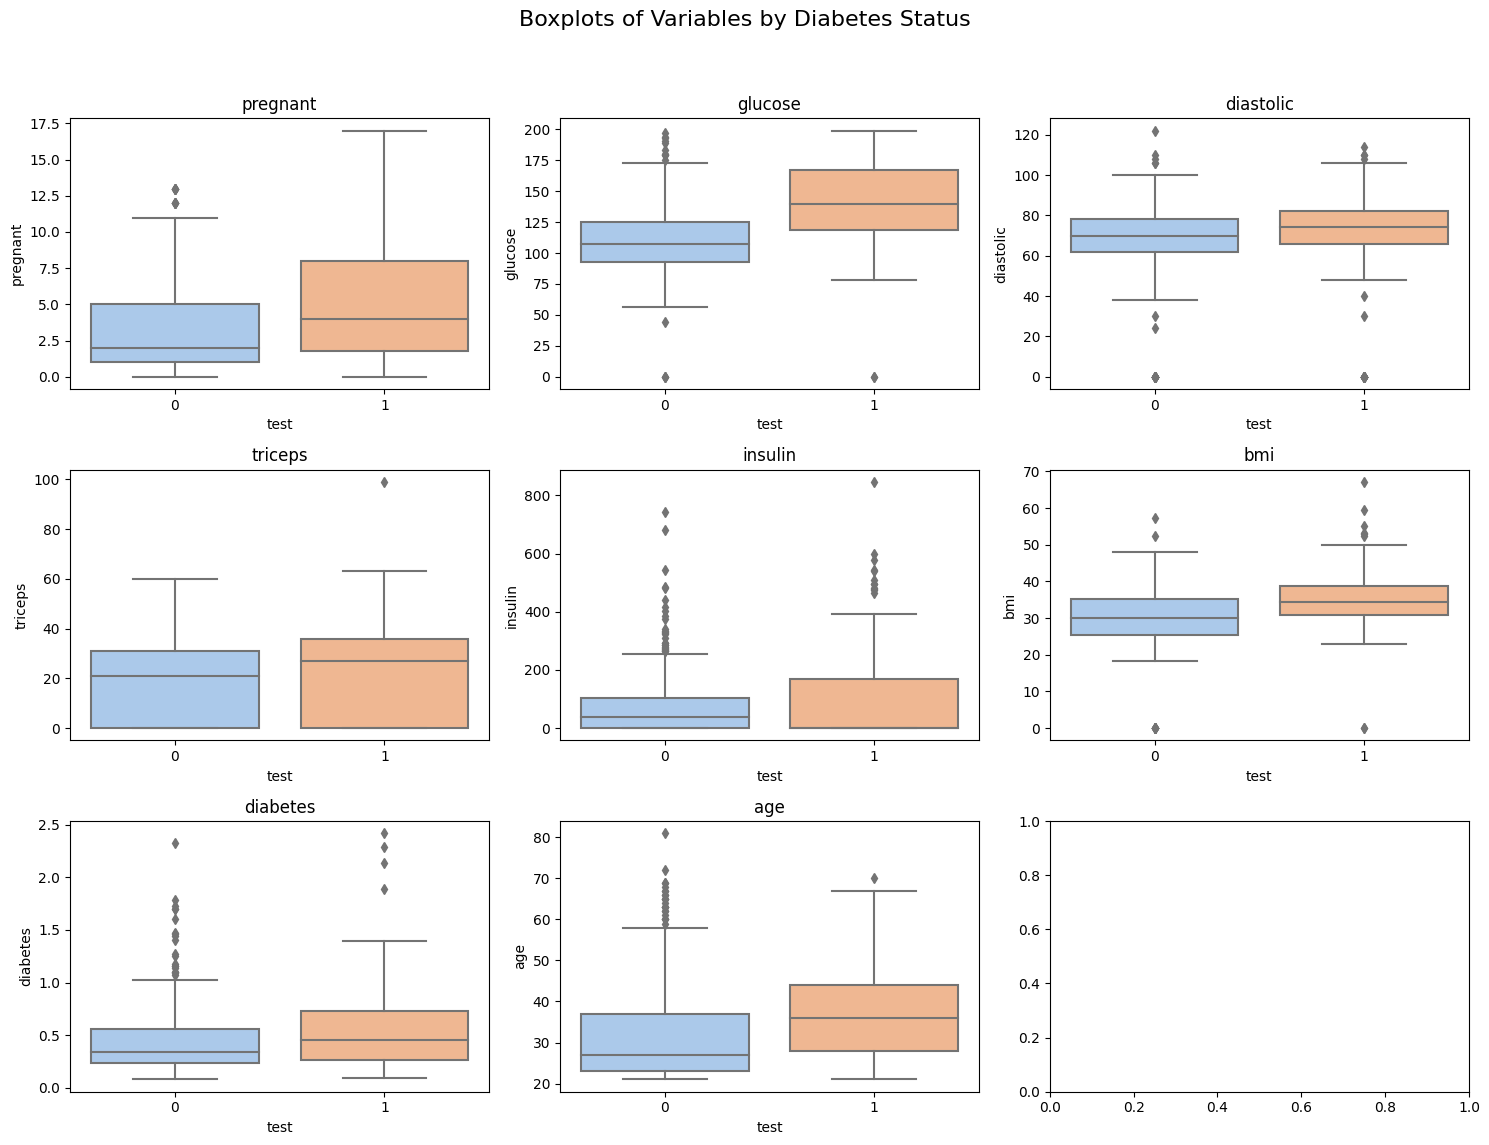

In [ ]:
import seaborn as sns

# Boxplots for each variable by diabetes status
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
fig.suptitle('Boxplots of Variables by Diabetes Status', fontsize=16)
for i, col in enumerate(cols):
    ax = axes[i//3, i%3]
    sns.boxplot(x='test', y=col, data=data, ax=ax, palette='pastel')
    ax.set_title(col)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**Boxplots of Variables by Diabetes Status:** * These plots compare the distribution of each variable for diabetic and non-diabetic persons.
  * **Pregnant:** Diabetic women have a slightly higher median, indicating a probable relationship between the number of pregnancies and diabetes.
  * **Glucose:** Diabetic persons have higher median glucose levels, demonstrating a significant link with diabetes. 
  * **Diastolic:** Diabetic individuals have somewhat higher blood pressure.
  * **Triceps:** Diabetics have a higher median triceps skin fold thickness.
  * **Insulin:** Higher amounts among diabetics, however data is inconsistent.
  * **BMI:** Higher BMI in diabetics, implying an association between obesity and diabetes. 
  * **Diabetes Pedigree Function:** Higher median values in diabetics, implying hereditary factors may play a role.
  * **Age:** Older age is linked to diabetes, implying that age is a risk factor.


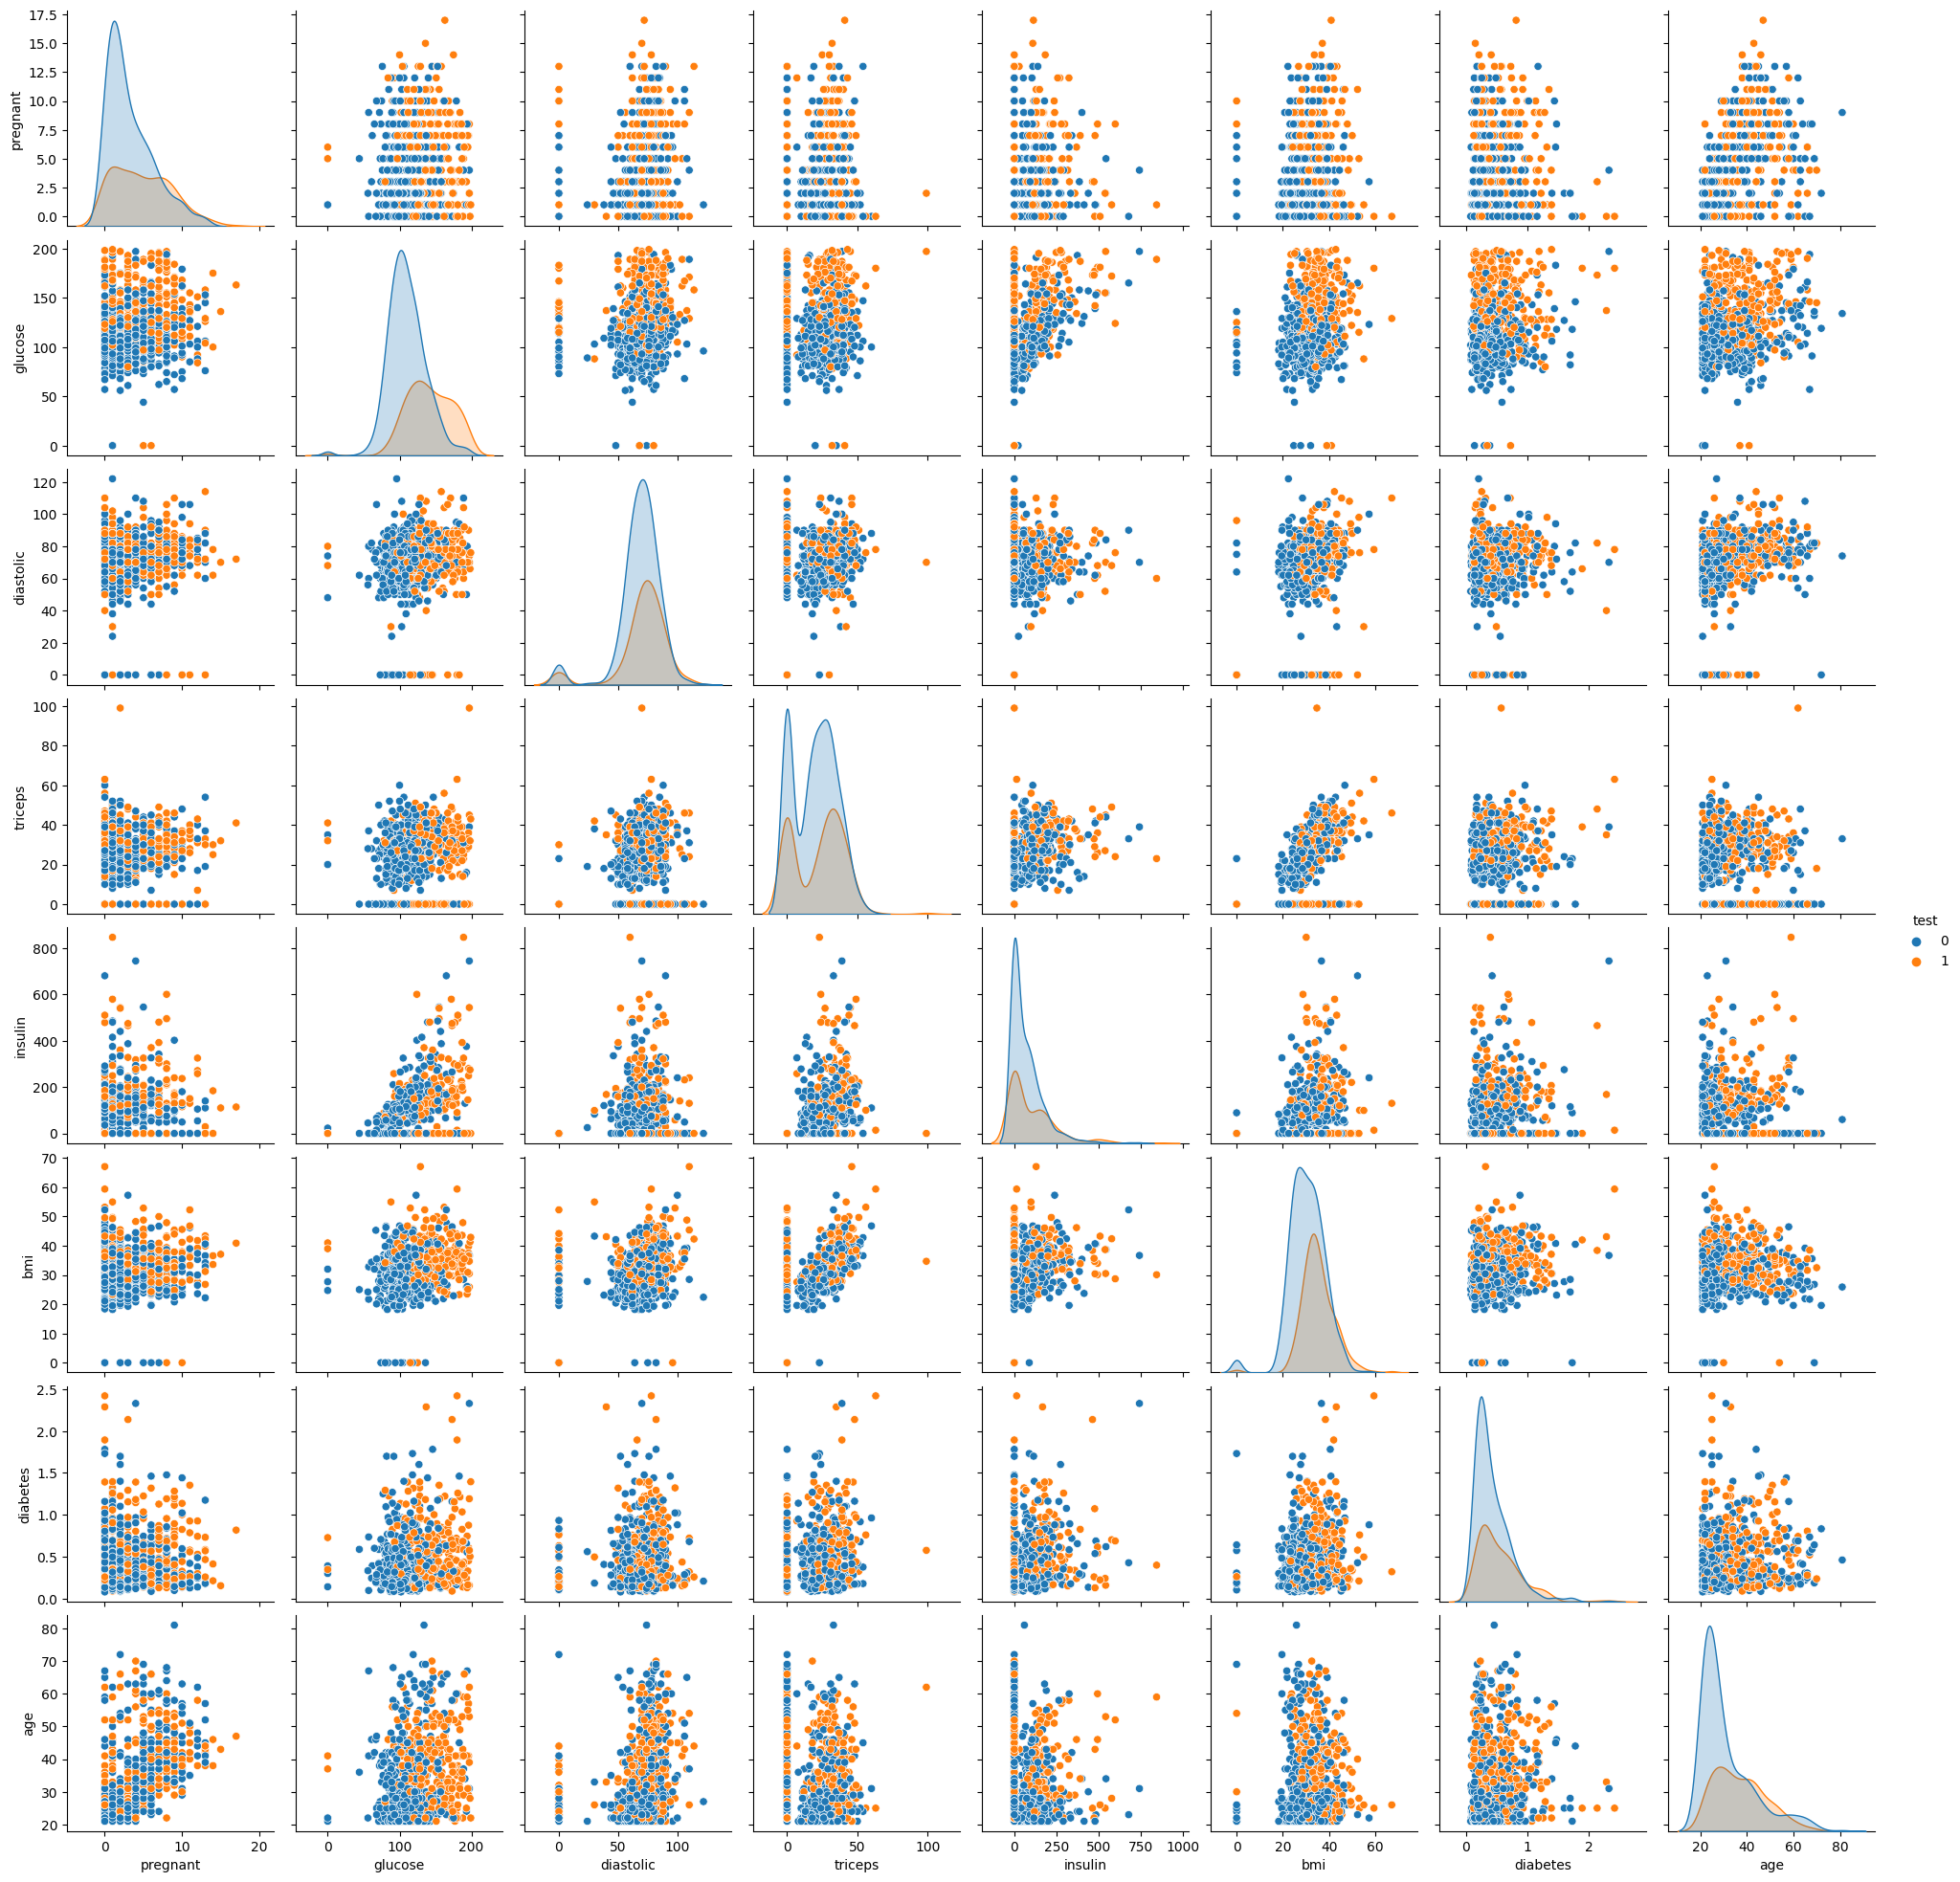

In [ ]:
# Pairplot to visualize relationships between variables
sns.pairplot(data, hue="test", diag_kind="kde")
plt.show()

The pairplot depicts the relationships between two variables. The 'test' variable is used to color-code the points. This can aid in the identification of potential patterns and trends.

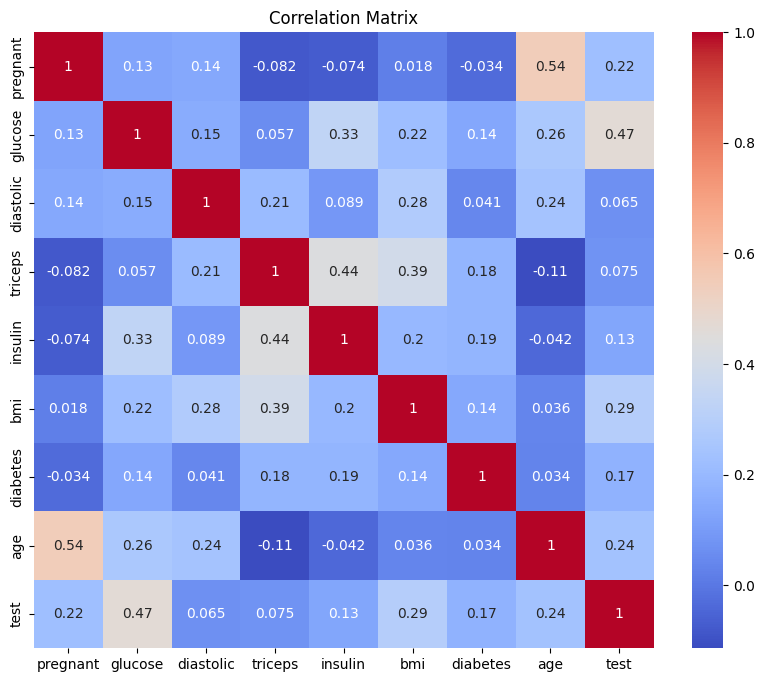

In [ ]:
# Correlation matrix
correlation_matrix = data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

The correlation matrix shows how each variable interacts with the others which means it displays the coefficients of correlation between variables. This aids in the detection of potential multicollinearity between independent variables. For example, glucose levels have a reasonably strong association with diabetes test results, indicating their usefulness in predicting diabetes.

# Formal Analysis

Linear Model (Interpretation of Regression Coefficients):
---
```
> linear_model <- glm(test ~ ., data = data, family = binomial)
> summary(linear_model)

Call:
glm(formula = test ~ ., family = binomial, data = data)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -8.4046964  0.7166359 -11.728  < 2e-16 ***
pregnant     0.1231823  0.0320776   3.840 0.000123 ***
glucose      0.0351637  0.0037087   9.481  < 2e-16 ***
diastolic   -0.0132955  0.0052336  -2.540 0.011072 *  
triceps      0.0006190  0.0068994   0.090 0.928515    
insulin     -0.0011917  0.0009012  -1.322 0.186065    
bmi          0.0897010  0.0150876   5.945 2.76e-09 ***
diabetes     0.9451797  0.2991475   3.160 0.001580 **
age          0.0148690  0.0093348   1.593 0.111192    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 993.48  on 767  degrees of freedom
Residual deviance: 723.45  on 759  degrees of freedom
AIC: 741.45

Number of Fisher Scoring iterations: 5
```

* In this scenario, the GLM assumes linear connections between the covariates and the log-odds of the response variable, which is the existence of diabetes.
* Each predictor variable has a linear term in the linear model.
* Coefficients:
  1. Intercept (-8.4047): 
    * The intercept indicates the log-odds of developing diabetes when all other predictors are equal to zero.   
    * It is -8.4047 in this example, and its significance (p-value 0.001) indicates a substantial deviation from zero.
  2. Pregnancies (0.1232): 
    * The log-odds of getting diabetes rise by 0.1232 for each successive pregnancy.   
    * The presence of a positive coefficient implies a link between the number of pregnancies and the risk of diabetes.
  3. Glucose (0.0352): 
    * The log-odds of getting diabetes rise by 0.0352 for every unit increase in glucose level.   
    * Higher glucose levels are linked to a higher risk of diabetes.
  4. Diastolic Blood Pressure (-0.0133): 
    * The log-odds of getting diabetes reduce by 0.0133 for each unit increase in diastolic blood pressure.
    * Lower diastolic blood pressure is linked to a higher risk of diabetes.
  5. Triceps, Insulin, and Age: 
    * These coefficients are not statistically significant, implying that these factors in this model do not have a linear connection with the log-odds of diabetes.
  6. BMI (0.0897): 
    * The log-odds of getting diabetes rise by 0.0897 for each unit increase in BMI.   
    * A higher BMI is linked to a higher risk of diabetes.
  7. Diabetes (0.9452): 
    * Developing a diabetic ancestor raises the log-odds of developing diabetes by 0.9452.   
    * A positive number indicates a strong positive relationship.


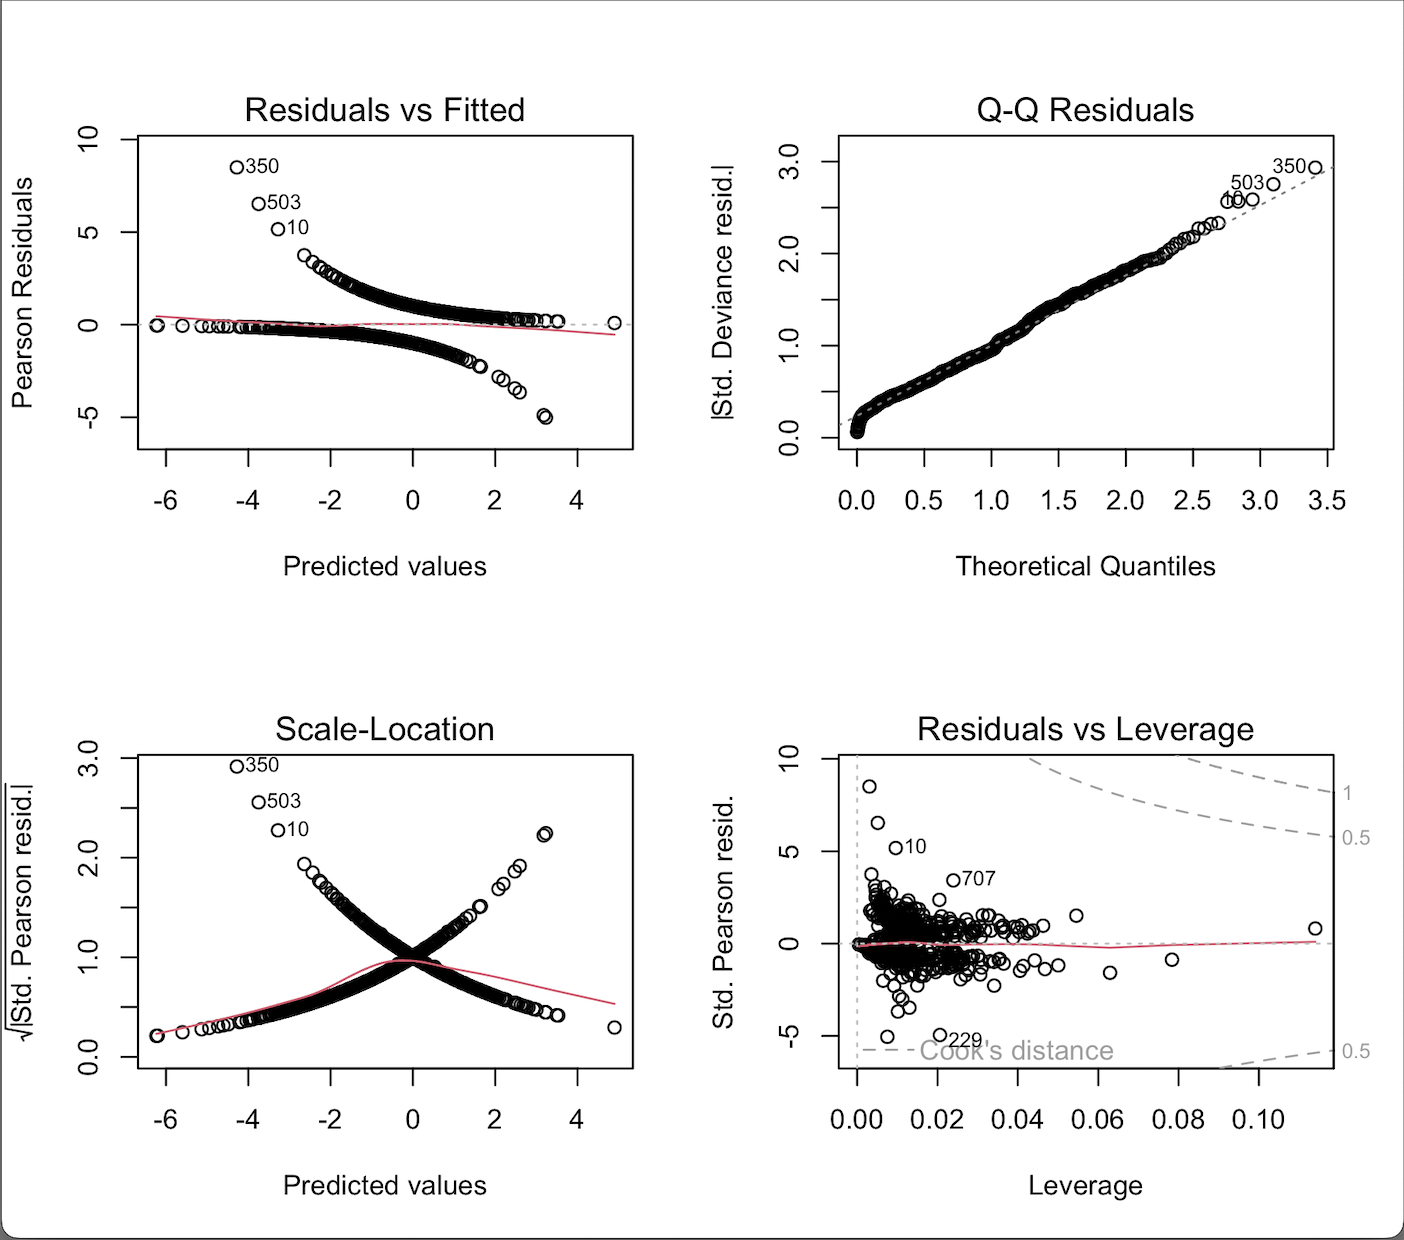

The plots presented are diagnostic plots for the linear model you fitted with the **glm** function, and are often used to validate the model's assumptions. Each plot is broken as below:

1. **Fitted vs. Residuals:** This graphic compares residuals (errors) to fitted values (predicted values). The red line should be horizontal at zero, indicating that the residuals have a constant variance (homoscedasticity). If the line curves, it indicates that the residual variance is not constant (heteroscedasticity). There is a little curve in the figure, indicating probable heteroscedasticity.

2. **Q-Q Plot (Quantile-Quantile Plot)**: The quantiles of the residuals are compared to the quantiles of a conventional normal distribution in this graphic. If the residuals are properly distributed, the points should be located roughly along a 45-degree line. The plot illustrates that the residuals vary from the straight line at the tails, showing that the residuals are not normally distributed, which can be problematic in a linear regression model. However, because we are employing a generalised linear model with a binomial family, the residuals aren't anticipated to be normally distributed, therefore the Q-Q plot isn't the best diagnostic plot. It is better applicable to linear regression models.

3. **Scale-Location (or Spread-Location) plot**: This plot is used to test the residuals' variance homogeneity (homoscedasticity). The points should be spread randomly, with no discernible pattern. The points in the figure show a pattern, indicating that the homoscedasticity assumption may be broken.

4. **Residuals vs. Leverage**: This graphic aids in the identification of influential observations that may have a disproportionate influence on the model. If the observations have a high leverage and a big residual, they may distort the regression line. In this plot, we are looking for locations that are far from the leverage's centre (horizontally) and have a high residual (vertically). Cook's distance lines (dashed lines) aid in the identification of significant instances. There appear to be a few potentially influential spots, but none surpass the standard Cook's distance criterion of 0.5, which is reassuring.


These diagnostics suggest that the assumptions behind the linear model may be flawed. The existence of heteroscedasticity and the pattern in the scale-location plot indicate that the constant variance assumption is not completely satisfied, and the Q-Q plot indicates that the residuals are not normally distributed, albeit this is not a required condition for a logistic regression model.

Additive Model (Interpretation of Non-linear Predictors - Plots):
---
```
> additive_model <- gam(test ~ s(pregnant) + s(glucose) + s(diastolic) + s(triceps) + s(insulin) + s(bmi) + s(diabetes) + s(age), data = data, family = binomial)
> summary(additive_model)

Family: binomial
Link function: logit

Formula:
test ~ s(pregnant) + s(glucose) + s(diastolic) + s(triceps) +
    s(insulin) + s(bmi) + s(diabetes) + s(age)

Parametric coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -1.0323     0.1159  -8.907   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
               edf Ref.df Chi.sq  p-value    
s(pregnant)  1.000  1.001  2.239 0.134760    
s(glucose)   4.492  5.448 83.723  < 2e-16 ***
s(diastolic) 1.000  1.000  5.688 0.017089 *  
s(triceps)   1.000  1.000  0.092 0.762183    
s(insulin)   7.880  8.641 12.183 0.139644    
s(bmi)       5.160  6.203 37.838 3.74e-06 ***
s(diabetes)  1.709  2.144 12.767 0.002091 **
s(age)       3.493  4.339 20.630 0.000667 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =  0.388   Deviance explained = 35.6%
UBRE = -0.097729  Scale est. = 1         n = 768
```

* For specified variables, the **gam** function is used to construct a logistic additive regression model with non-linear components.
* For specified predictor variables, the additive model contains non-linear factors (smooth terms).
* Smooth terms (s( )) capture non-linear correlations between predictors and diabetes log-odds.
* The R-sq.(adj) value shows that the model explains 38.8% of the response variability.

* Smooth Terms:
  1. **s(Glucose):** 
    * The glucose plot (s(glucose)) reveals a non-linear association between glucose levels and the log-odds of getting diabetes.
    * It is needed to interpret the curve's structure to learn how variations in glucose levels affect diabetes risk.
  2. **s(BMI):** 
    * The BMI plot (s(bmi)) demonstrates a nonlinear association between BMI and the log-odds of getting diabetes.
    * It is needed to examine the curve to see how the risk of diabetes increases as BMI changes.
  3. **s(Age):** 
    * The age plot (s(age)) demonstrates a nonlinear association between age and the log-odds of getting diabetes.
    * It is needed to interpret the curve to learn how age affects diabetes risk.
  4. **s(Diabetes):** 
    * The diabetes pedigree function plot (s(diabetes)) demonstrates a non-linear association with the log-odds of developing diabetes.
    * It is needed to understand the influence of the diabetes pedigree function on diabetes risk by interpreting the form of the curve.

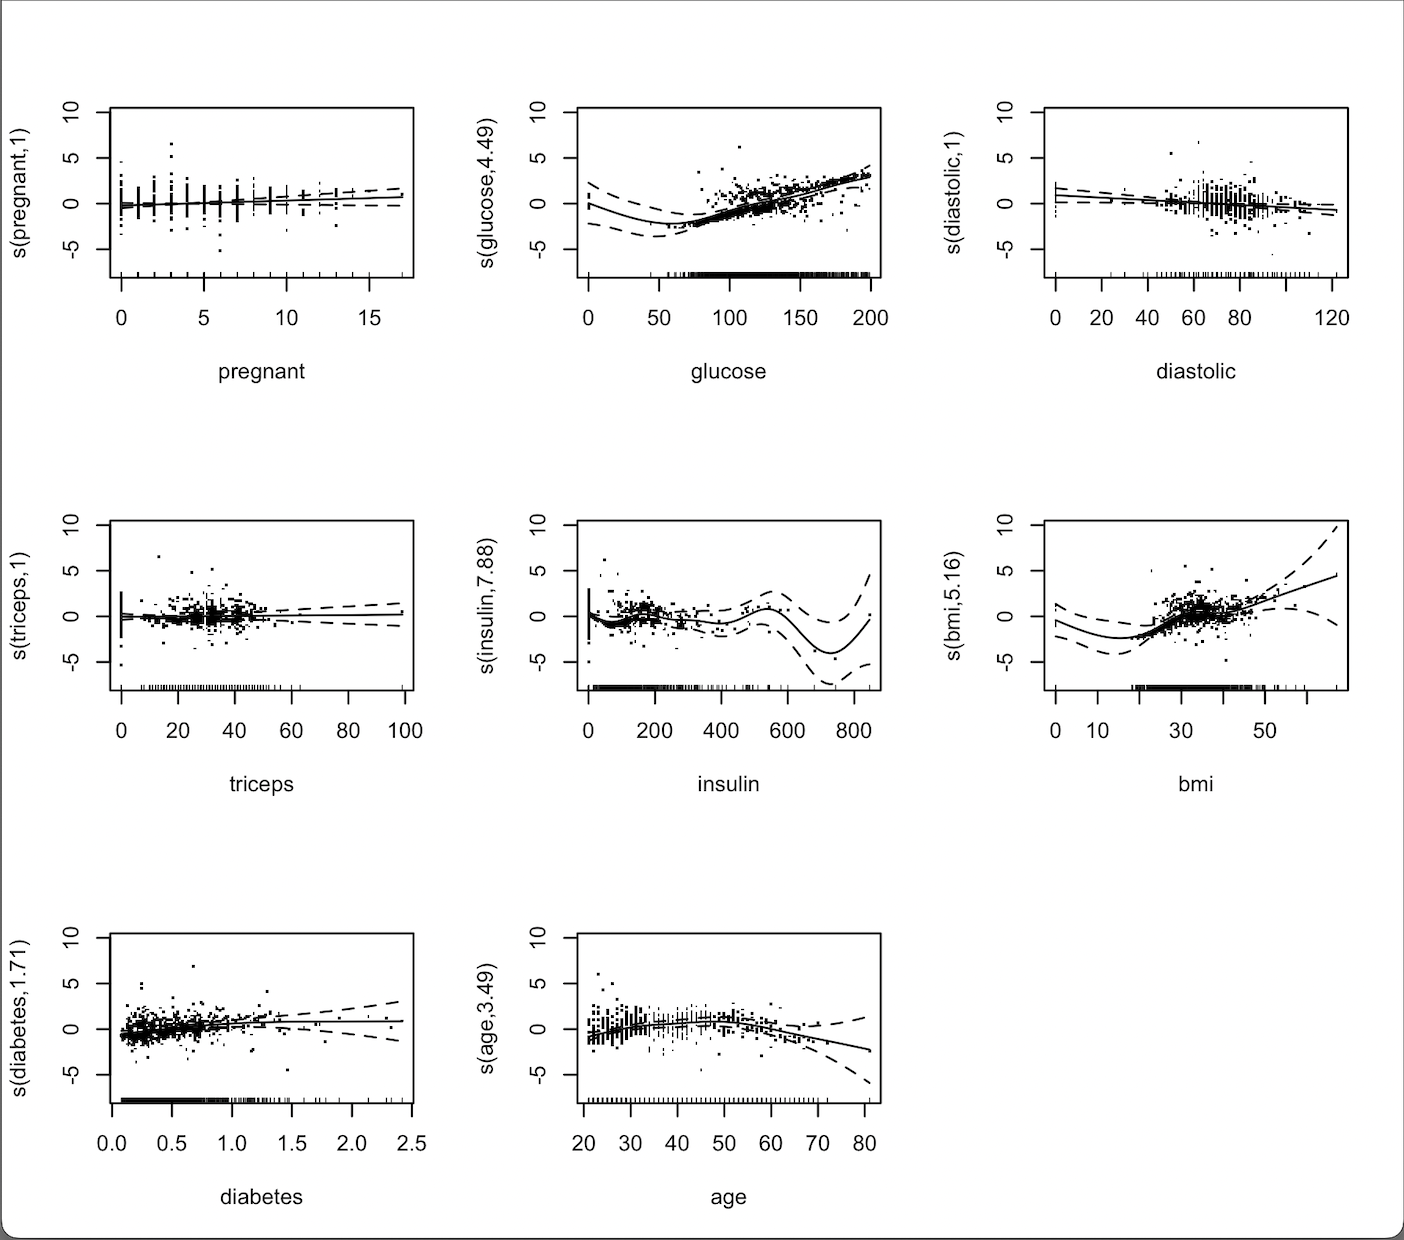

The graphs appear to be diagnostic plots for the Generalised Additive Model's (GAM) non-linear predictors. These plots employ smoothing functions to highlight the connection between each predictor and the response, as well as the confidence intervals. Here's a quick rundown of each:

  1. **Pregnant:** The plot for 'pregnant' displays an approximately horizontal line, showing that a person's number of pregnancies does not have a strong non-linear association with the risk of a positive diabetes test.

  2. **Glucose**: A definite non-linear link exists between glucose levels and response. The risk of a positive diabetes test rises as glucose levels rise, especially at higher glucose levels.

  3. **Diastolic:** The 'diastolic' blood pressure plot indicates a modest non-linear connection. The confidence intervals are relatively large, indicating that this link is questionable.

  4. **Triceps:** The almost horizontal line indicates that the triceps skinfold thickness has no meaningful link with the diabetes test result.

  5. **Insulin:** Insulin levels have a non-linear connection with the reaction, but the large confidence intervals and flat line at higher insulin levels indicate that the impact is not constant over the insulin level range.

  6. **BMI:** Body Mass Index (BMI) plot shows a non-linear connection. The chance of a positive diabetes test initially increases as BMI increases, but the association flattens off at higher BMI levels.

  7. **Diabetes:** The diabetes pedigree function demonstrates that larger values of the pedigree function increase the risk of a positive diabetes test, but the impact plateaus as the values grow.

  8. **Age:** The association between age and response is non-linear, with the chance of a positive test rising with age up to a point before diminishing.

The y-axis in each figure indicates the partial residuals that account for the predictor's non-linear influence on the response, while the x-axis represents the predictor itself. The solid line is the estimated smooth function, while the dotted lines indicate the estimated 95% confidence intervals. When the confidence intervals are broad, it shows that the estimations are less definite.

In summary, these graphs aid in understanding how each predictor interacts with the response variable in a non-linear manner. It is crucial to remember that these are only partial effects, and the real influence of each predictor on the response will also rely on the values of the model's other variables.

Model Selection
---
```
> cat("Linear Model AIC: ", AIC(linear_model), "\n")
Linear Model AIC:  741.4454
> cat("Linear Model BIC: ", BIC(linear_model), "\n")
Linear Model BIC:  783.2395
> cat("Additive Model AIC: ", AIC(additive_model), "\n")
Additive Model AIC:  692.9437
> cat("Additive Model BIC: ", BIC(additive_model), "\n")
Additive Model BIC:  817.0895
```

Model selection entails evaluating the AIC and BIC values of the GLM and GAM. A lower AIC indicates a better fit to the data, but a lower BIC indicates a simpler model in terms of parsimony.

* Based on the AIC and BIC values, the additive model appears to be a better match than the linear model. 
* The linear model has an AIC of 741.45 and a BIC of 783.24.
* The additive model's AIC is 692.94, while its BIC is 817.09. 
* Non-linear connections are allowed in the additive model, which may better describe the complicated links between predictors and diabetes risk.

Model Assumptions Check
---
Assumptions for the GLM include log odds linearity, error independence, no multicollinearity, and variance homogeneity. The main assumption for the GAM is that the chosen smooth functions can appropriately describe the connection between variables and response.

We found indicators of probable GLM violations, such as heteroscedasticity and non-normal residual distribution, from the diagnostic plots and the form of the residuals. However, for a binomial GLM, residual normality is not a rigorous requirement. The GAM assumption checks would necessitate an analysis of the residuals from the additive smooths, and based on the previously presented plots, it appears that the GAM captures non-linear connections effectively.

To summarise, both models have benefits, but the GAM looks to give a superior fit to this specific dataset, capturing non-linear interactions that are likely present between the variables and the response. Its complexity, however, is greater, and so the decision between models may ultimately be determined by the precise aims of the study and the relative relevance of simplicity versus fit.

# Conclusion

The study examines the association between physiological and genetic variables and the risk of diabetes in adult female Pima Indians using Generalised Linear Models (GLM) and Generalised Additive Models (GAM), as well as diagnostic plots. The GLM analysis found critical variables, indicating that high plasma glucose concentration, body mass index (BMI), diabetes pedigree function, number of pregnancies, and diastolic blood pressure all have a substantial impact on diabetes risk. GAM plots show that these predictors have non-linear relationships: glucose concentration and BMI have increasing risks up to certain thresholds, diabetes pedigree function and age have threshold-based risk patterns, and diastolic blood pressure has a minor non-linear effect on diabetes risk.

Diagnostic checks highlight possible problems with heteroscedasticity and influential points in GLM, while the robustness of logistic regression mitigates these concerns to some extent. According to GAM diagnostic charts, non-linear models capture the impact of particular variables on diabetes risk better than basic linear models. Finally, plasma glucose concentration, BMI, and diabetes pedigree function are the most important indicators of diabetes risk in adult female Pima Indians, emphasising the significance of non-linear interactions. Monitoring and regulating glucose levels and BMI should be prioritised in healthcare treatments, recognising the complex influence of these parameters. Furthermore, taking into account family history via the diabetes pedigree function is critical in risk assessments, with the possibility for further refinement using sophisticated modelling approaches and examining variable interactions.

# Discussion

The study of diabetes risk variables in adult female Pima Indians employed both linear and non-linear statistical models. The decision between a linear (GLM) and a non-linear (GAM) model is based on the trade-off between simplicity and capturing complicated connections. The GLM presupposes linearity, whereas the GAM provides for greater flexibility, although there is a danger of overfitting. Model selection should take into account statistical fit, as measured by AIC and BIC, as well as biological plausibility. Pregnancies and diastolic blood pressure, for example, are significant indicators that require careful assessment of their real influence on diabetes risk, taking into account magnitude and practical consequences. The importance of multicollinearity, diagnostic testing for model assumptions, and biological reasoning cannot be overstated. The limited generalizability of the data to Pima Indians necessitates a careful interpretation of the findings.

In the future, investigating interaction effects and integrating more variables using sophisticated statistical approaches such as machine learning might improve predicted accuracy. Despite giving useful insights, the study emphasises the significance of cautious interpretation, understanding biological pathways, and the possible need for more research to deepen our understanding of diabetes risk in certain groups.